In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("D:\Anaconda3\Tensorflow\MNIST_data",one_hot=True)
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

#命名空间
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,[None,784],name='x-input')
    y = tf.placeholder(tf.float32,[None,10],name='y-input')

with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        w = tf.Variable(tf.zeros([784,10]),name='w')
    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([10]),name='b')
    with tf.name_scope('wx_plus_b'):
        wx_plus_b = tf.matmul(x,w) + b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)
with tf.name_scope('loss'):
    #loss = tf.reduce_mean(tf.square(y - prediction))
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))
with tf.name_scope('train'):
    train = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    #引号内即路径，存放graph结构
    writer = tf.summary.FileWriter('D:/Anaconda3/Tensorflow/logs/',sess.graph)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_yx = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={x:batch_xs,y:batch_yx})
            
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print("Iter "+ str(epoch) + ", Testing Accuracy "+ str(acc))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\Anaconda3\Tensorflow\MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\Anaconda3\Tensorflow\MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:\Anaconda3\Tensorflow\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting D:\Anaconda3\Tensorflow\MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Iter 0, Testin

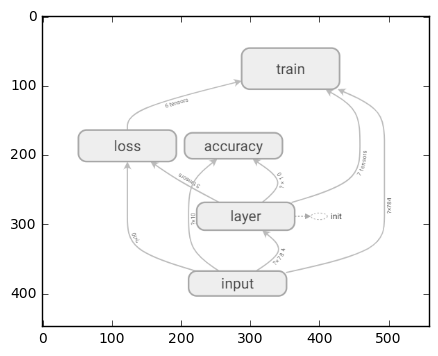

In [5]:
#win+r  cmd   tensorboard --logdir=D:\Anaconda3\Tensorflow\logs
#then copy the address to browser
import matplotlib.pyplot as plt
img = tf.gfile.FastGFile('D:/Github/learn-tensorflow/image/tensorboard.png','rb').read()
img_data = tf.image.decode_png(img)
with tf.Session() as sess:
    plt.figure()
    plt.imshow(img_data.eval())
    plt.show()